# Problem Statement

HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.

After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 

# Business Goal

To categorise the countries using some socio-economic and health factors that determine the overall development of the country by to suggesting the countries which the CEO needs to focus on the most.  The datasets containing those socio-economic factors and the corresponding data dictionary are uaed for analysis and modelling

# Understanding the Data

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [ ]:
import numpy as np
import pandas as pd

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# Visualizations
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
from pylab import rcParams

In [5]:
ngo = pd.read_csv(r'C:\Users\Sujatha\Desktop\Data Science\ml - 11\clustering\submission\Country-data (1).csv')
ngo.head()

country  child_mort  exports  health  imports  income  \
0  Afghanistan         90.2000     10.0000  7.5800  44.9000   1610     
1  Albania             16.6000     28.0000  6.5500  48.6000   9930     
2  Algeria             27.3000     38.4000  4.1700  31.4000   12900    
3  Angola              119.0000    62.3000  2.8500  42.9000   5900     
4  Antigua and Barbuda 10.3000     45.5000  6.0300  58.9000   19100    

   inflation  life_expec  total_fer   gdpp  
0 9.4400     56.2000     5.8200      553    
1 4.4900     76.3000     1.6500      4090   
2 16.1000    76.5000     2.8900      4460   
3 22.4000    60.1000     6.1600      3530   
4 1.4400     76.8000     2.1300      12200

In [6]:
# Shape of the dataframe (Rows & Columns)
ngo.shape

(167, 10)

In [7]:
# basic information of the dataframe
ngo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [8]:
# Descriptive Statistics

ngo.describe()

child_mort  exports   health  imports      income  inflation  \
count 167.0000    167.0000 167.0000 167.0000 167.0000    167.0000     
mean  38.2701     41.1090  6.8157   46.8902  17144.6886  7.7818       
std   40.3289     27.4120  2.7468   24.2096  19278.0677  10.5707      
min   2.6000      0.1090   1.8100   0.0659   609.0000    -4.2100      
25%   8.2500      23.8000  4.9200   30.2000  3355.0000   1.8100       
50%   19.3000     35.0000  6.3200   43.3000  9960.0000   5.3900       
75%   62.1000     51.3500  8.6000   58.7500  22800.0000  10.7500      
max   208.0000    200.0000 17.9000  174.0000 125000.0000 104.0000     

       life_expec  total_fer        gdpp  
count 167.0000    167.0000   167.0000     
mean  70.5557     2.9480     12964.1557   
std   8.8932      1.5138     18328.7048   
min   32.1000     1.1500     231.0000     
25%   65.3000     1.7950     1330.0000    
50%   73.1000     2.4100     4660.0000    
75%   76.8000     3.8800     14050.0000   
max   82.8000     7.4900     105000.0000

Inference : From the dataframe, few values are in % and others are integers. Variables are of different data types. Because of variablity in the data scaling is required before model building.

# Missing value check

In [9]:
round(100*(ngo.isnull().sum())/len(ngo), 2)

country      0.0000
child_mort   0.0000
exports      0.0000
health       0.0000
imports      0.0000
income       0.0000
inflation    0.0000
life_expec   0.0000
total_fer    0.0000
gdpp         0.0000
dtype: float64

Inference : No missing values seen

# Dropping duplicates (if any)

In [10]:
# Shape before dropping duplicates
ngo.shape

(167, 10)

In [11]:
# Checking for duplicates and dropping the entire duplicate row if any
ngo.drop_duplicates(subset=None, inplace=True)

In [12]:
# Shape after dropping duplicates
ngo.shape

(167, 10)

Inference : No duplicates seen

# Data Transformation

In the dataframe, the 'imports', 'exports' and 'health' variable seems to be in percentage of GDP per capita, and this can sometimes give an incorrect insight in our EDA. for example, the health spending of 'United states' is 17.9 and that of 'Sierra Leone' is '13.1', both of which are very close to each other in health spending in terms of their % of GDP per capita. But these figures do not actually tell us the real story of how rich and poor are 'USA' and 'Sierra Leone' is. So the best way to tackle it is to convert the % values to ABSOLUTE values

In [13]:
#Checking the values before transformation
ngo.head()

country  child_mort  exports  health  imports  income  \
0  Afghanistan         90.2000     10.0000  7.5800  44.9000   1610     
1  Albania             16.6000     28.0000  6.5500  48.6000   9930     
2  Algeria             27.3000     38.4000  4.1700  31.4000   12900    
3  Angola              119.0000    62.3000  2.8500  42.9000   5900     
4  Antigua and Barbuda 10.3000     45.5000  6.0300  58.9000   19100    

   inflation  life_expec  total_fer   gdpp  
0 9.4400     56.2000     5.8200      553    
1 4.4900     76.3000     1.6500      4090   
2 16.1000    76.5000     2.8900      4460   
3 22.4000    60.1000     6.1600      3530   
4 1.4400     76.8000     2.1300      12200

In [14]:
# Checking the new shape of the dataframe
ngo.shape

(167, 10)

In [15]:
ngo['imports'] = ngo['imports'] * ngo['gdpp']/100
ngo['exports'] = ngo['exports'] * ngo['gdpp']/100
ngo['health'] = ngo['health'] * ngo['gdpp']/100

ngo.head()

country  child_mort   exports   health   imports  income  \
0  Afghanistan         90.2000     55.3000   41.9174  248.2970   1610     
1  Albania             16.6000     1145.2000 267.8950 1987.7400  9930     
2  Algeria             27.3000     1712.6400 185.9820 1400.4400  12900    
3  Angola              119.0000    2199.1900 100.6050 1514.3700  5900     
4  Antigua and Barbuda 10.3000     5551.0000 735.6600 7185.8000  19100    

   inflation  life_expec  total_fer   gdpp  
0 9.4400     56.2000     5.8200      553    
1 4.4900     76.3000     1.6500      4090   
2 16.1000    76.5000     2.8900      4460   
3 22.4000    60.1000     6.1600      3530   
4 1.4400     76.8000     2.1300      12200

In [16]:
# Checking the new shape of the dataframe
ngo.shape

(167, 10)

In [17]:
ngo.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Outlier Treatment

In [18]:
ngo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [19]:
ngo.shape

(167, 10)

In [20]:
ngo.describe()

child_mort     exports    health     imports      income  inflation  \
count 167.0000    167.0000    167.0000  167.0000    167.0000    167.0000     
mean  38.2701     7420.6188   1056.7332 6588.3521   17144.6886  7.7818       
std   40.3289     17973.8858  1801.4089 14710.8104  19278.0677  10.5707      
min   2.6000      1.0769      12.8212   0.6511      609.0000    -4.2100      
25%   8.2500      447.1400    78.5355   640.2150    3355.0000   1.8100       
50%   19.3000     1777.4400   321.8860  2045.5800   9960.0000   5.3900       
75%   62.1000     7278.0000   976.9400  7719.6000   22800.0000  10.7500      
max   208.0000    183750.0000 8663.6000 149100.0000 125000.0000 104.0000     

       life_expec  total_fer        gdpp  
count 167.0000    167.0000   167.0000     
mean  70.5557     2.9480     12964.1557   
std   8.8932      1.5138     18328.7048   
min   32.1000     1.1500     231.0000     
25%   65.3000     1.7950     1330.0000    
50%   73.1000     2.4100     4660.0000    
75%   76.8000     3.8800     14050.0000   
max   82.8000     7.4900     105000.0000

# Checking for the Outliers

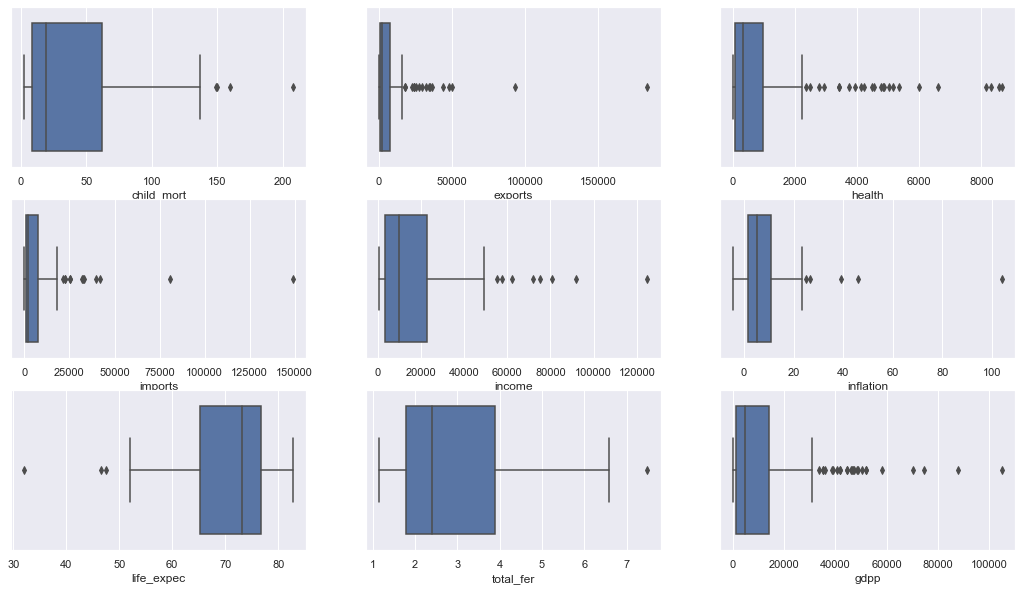

In [21]:
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(ngo.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(ngo.exports)
plt.subplot(3, 3, 3)
sns.boxplot(ngo.health)
plt.subplot(3, 3, 4)
sns.boxplot(ngo.imports)
plt.subplot(3, 3, 5)
sns.boxplot(ngo.income)
plt.subplot(3, 3, 6)
sns.boxplot(ngo.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(ngo.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(ngo.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(ngo.gdpp)
plt.show()

Inference : There seems to be outliers in every single variable. This is a very delicate situation in terms of Business problem statement & Clustering analysis. - If we apply outlier treatment by CAPPING this will change the ranking of few countries with respect to requirement of Financial Aid. Also we will still have some outlier present after Capping, so its not a wise decision in this business scenario. - If we apply outlier treatment by Deletion based on IQR values, this will remove few countries from the list that would have really deserved the Financial Aid. - If we do not apply Outlier treatment, it can impact the clustering model, as the presence of Outlier can change the CENTROID (K-Means) of the cluster. - After considering all these scenarios, It's better to go with the model which suites the Business Problem better. That is, not to treat the Outlier, and check the model with different K values to see which one gives a better business outcome.

# Exploratory Data Analysis

# Visualising Distribution

pairplot of all the numeric variables

In [22]:
ngo.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

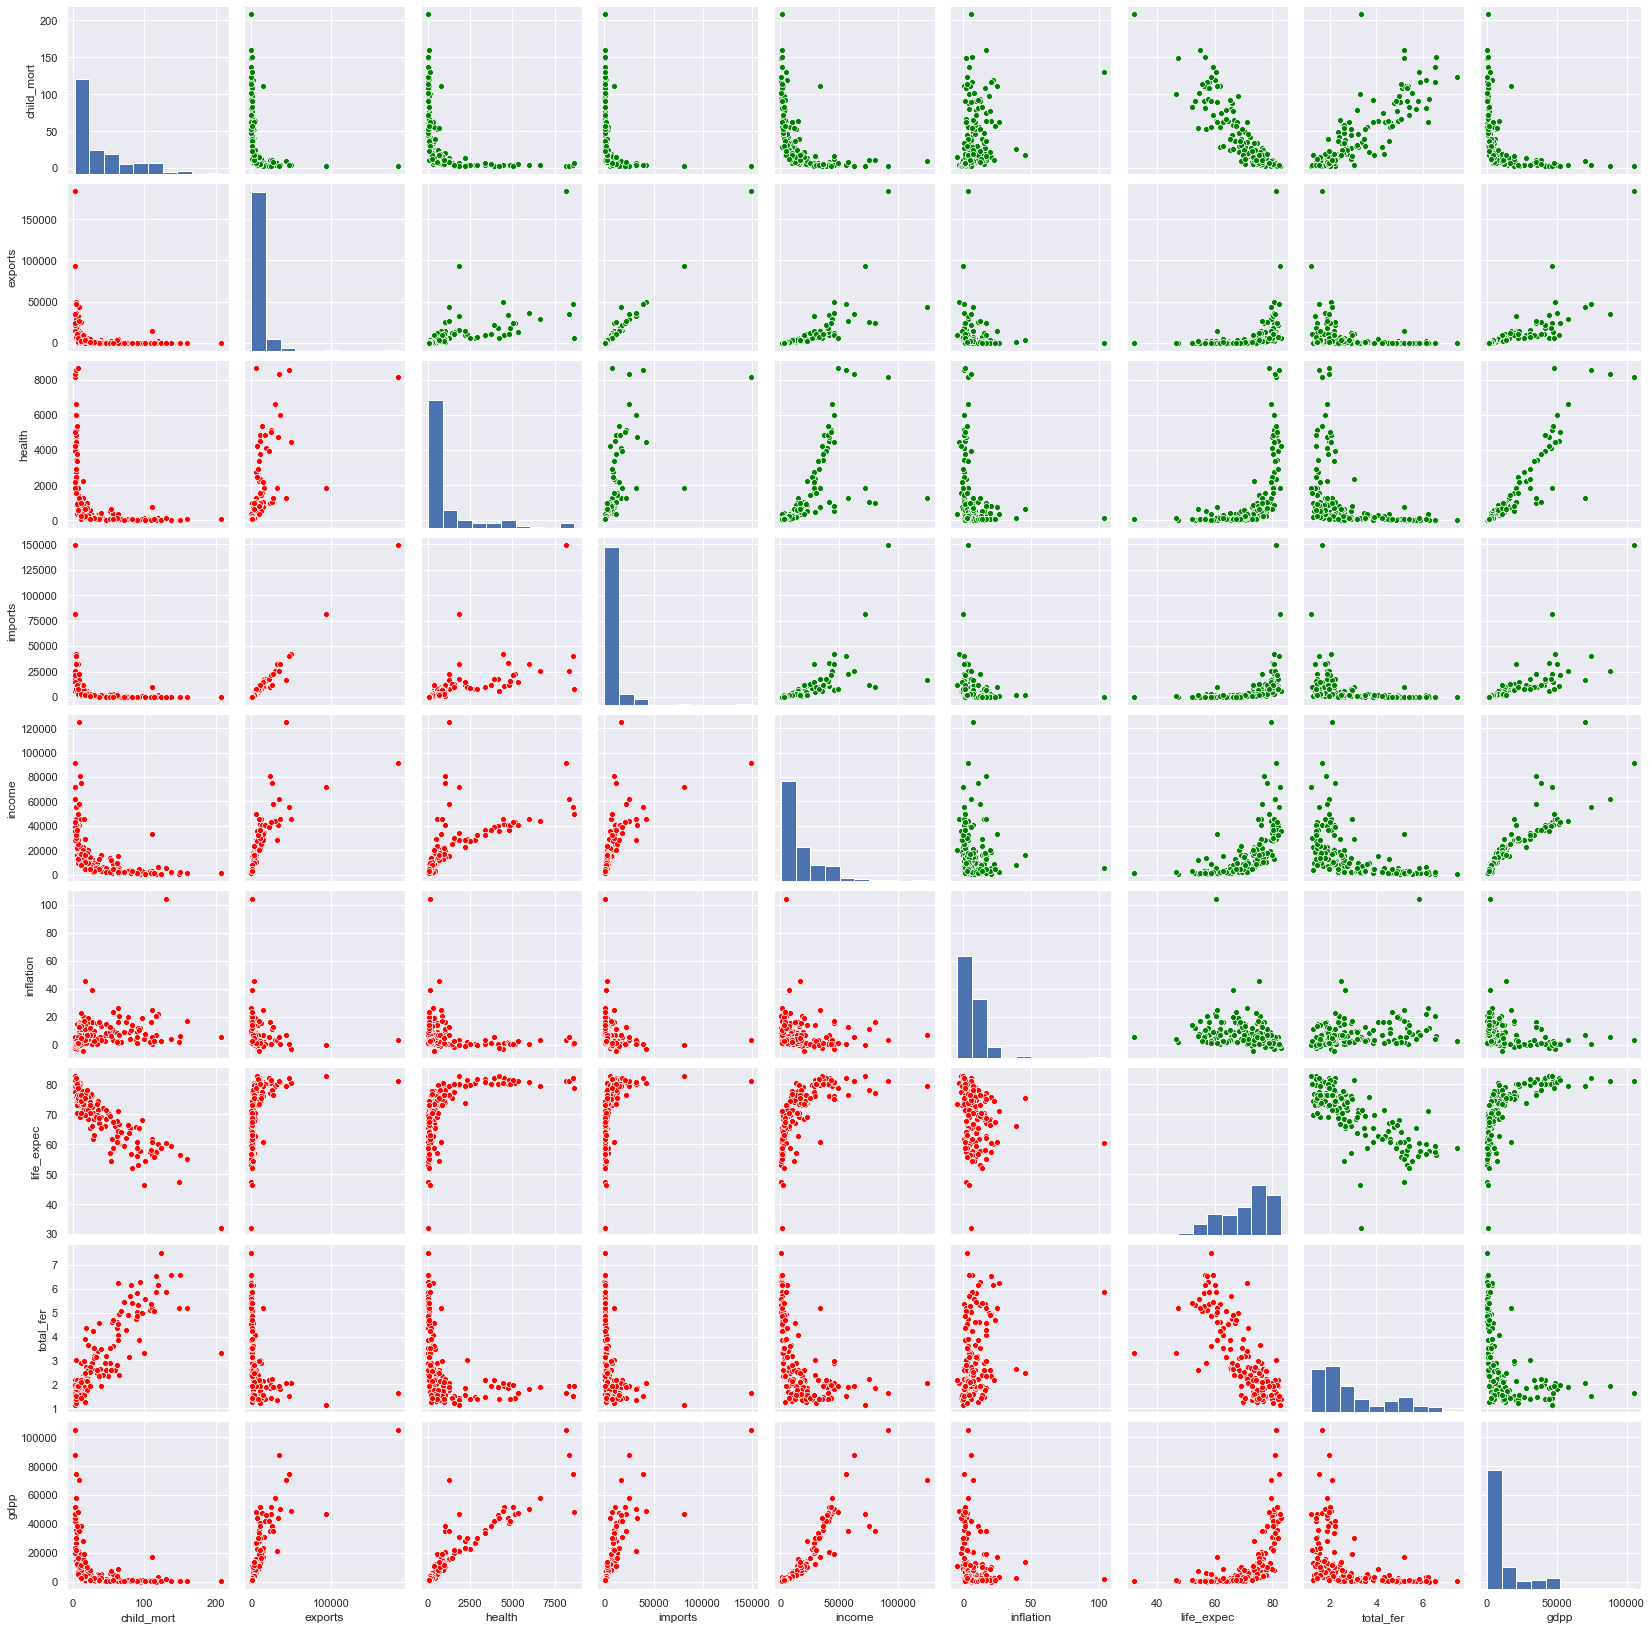

In [23]:
ngo_num=ngo[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]

# sns.pairplot(ngo_num,diag_kind='kde')


g = sns.PairGrid(ngo_num)
g.map_upper(sns.scatterplot,color='green')
g.map_lower(sns.scatterplot, color='red')
g.map_diag(plt.hist)

plt.show()

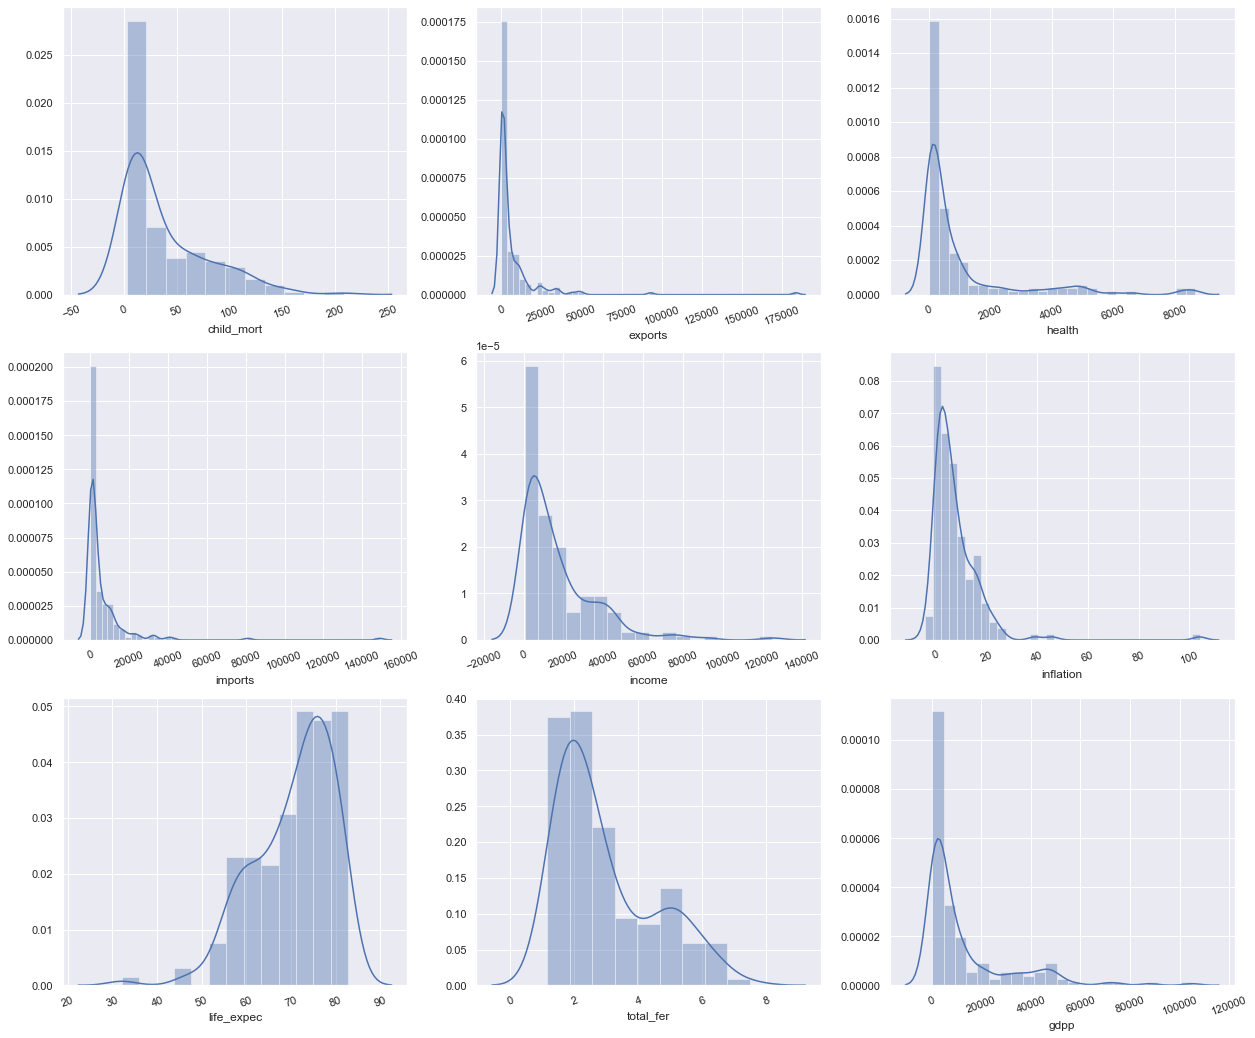

In [24]:
import matplotlib.pyplot as plt


plt.figure(figsize=(21, 18))
features = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(ngo_num[i[1]])
    plt.xticks(rotation=20)

Inference : Most of the data point are 'NOT Normally' distributed. variance and range are differnt. so there is a need of standardising the data before we build the model. Since we need to compute the Euclidean distance between the data points, it is important to ensure that the attributes with a larger range of values do not out-weight the attributes with smaller range. Thus, scaling down of all attributes to the same normal scale is important.

# Scaling the data

let's use standardisation method for scaling the data

In [25]:
ngo.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [26]:
# New dataframe with only Numeric variables, for scaling

ngo_new=ngo[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].copy()

In [27]:
ngo_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0 KB


In [28]:
ngo_new.describe()

child_mort     exports    health     imports      income  inflation  \
count 167.0000    167.0000    167.0000  167.0000    167.0000    167.0000     
mean  38.2701     7420.6188   1056.7332 6588.3521   17144.6886  7.7818       
std   40.3289     17973.8858  1801.4089 14710.8104  19278.0677  10.5707      
min   2.6000      1.0769      12.8212   0.6511      609.0000    -4.2100      
25%   8.2500      447.1400    78.5355   640.2150    3355.0000   1.8100       
50%   19.3000     1777.4400   321.8860  2045.5800   9960.0000   5.3900       
75%   62.1000     7278.0000   976.9400  7719.6000   22800.0000  10.7500      
max   208.0000    183750.0000 8663.6000 149100.0000 125000.0000 104.0000     

       life_expec  total_fer        gdpp  
count 167.0000    167.0000   167.0000     
mean  70.5557     2.9480     12964.1557   
std   8.8932      1.5138     18328.7048   
min   32.1000     1.1500     231.0000     
25%   65.3000     1.7950     1330.0000    
50%   73.1000     2.4100     4660.0000    
75%   76.8000     3.8800     14050.0000   
max   82.8000     7.4900     105000.0000

In [29]:
# rescaling

# instantiate
scaler = StandardScaler()

# fit_transform
ngo_scaled = scaler.fit_transform(ngo_new)
ngo_scaled.shape

(167, 9)

In [30]:
ngo_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [31]:
ngo.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [32]:
#Converting it into a dataframe

ngo_scaled = pd.DataFrame(ngo_scaled)
ngo_scaled.columns = ['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']
ngo_scaled.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0 1.2915      -0.4110  -0.5650 -0.4323  -0.8082 0.1573     -1.6191       
1 -0.5389     -0.3502  -0.4392 -0.3137  -0.3754 -0.3123    0.6479        
2 -0.2728     -0.3185  -0.4848 -0.3537  -0.2208 0.7893     0.6704        
3 2.0078      -0.2914  -0.5324 -0.3460  -0.5850 1.3871     -1.1792       
4 -0.6956     -0.1043  -0.1788 0.0407   0.1017  -0.6017    0.7043        

   total_fer    gdpp  
0 1.9029     -0.6792  
1 -0.8600    -0.4856  
2 -0.0384    -0.4654  
3 2.1282     -0.5163  
4 -0.5419    -0.0418

# Hopkins Statistics

Before we apply any clustering algorithm to the given data, it's important to check whether the given data has some meaningful clusters or not? which in general means the given data is not random. The process to evaluate the data to check if the data is feasible for clustering or not is know as the clustering tendency. To check cluster tendency, we use Hopkins test. Hopkins test examines whether data points differ significantly from uniformly distributed data in the multidimensional space.

In [33]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
        H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [34]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(ngo_scaled)

0.9160707203282866

Inference - Hopkins Statistic over .70 is a good score that indicates the data is good for cluster analysis. - A 'Hopkins Statistic' value close to 1 tends to indicate the data is highly clustered, random data will tend to result in values around 0.5, and uniformly distributed data will tend to result in values close to 0.

# Modelling

# Hierarchical Clustering

Now using Hierarchical Clustering to identify appropriate cluster size with a good split of data (Max Intra-Cluster distance & Min Inter-Cluster Distance)

In [35]:
ngo_scaled.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0 1.2915      -0.4110  -0.5650 -0.4323  -0.8082 0.1573     -1.6191       
1 -0.5389     -0.3502  -0.4392 -0.3137  -0.3754 -0.3123    0.6479        
2 -0.2728     -0.3185  -0.4848 -0.3537  -0.2208 0.7893     0.6704        
3 2.0078      -0.2914  -0.5324 -0.3460  -0.5850 1.3871     -1.1792       
4 -0.6956     -0.1043  -0.1788 0.0407   0.1017  -0.6017    0.7043        

   total_fer    gdpp  
0 1.9029     -0.6792  
1 -0.8600    -0.4856  
2 -0.0384    -0.4654  
3 2.1282     -0.5163  
4 -0.5419    -0.0418

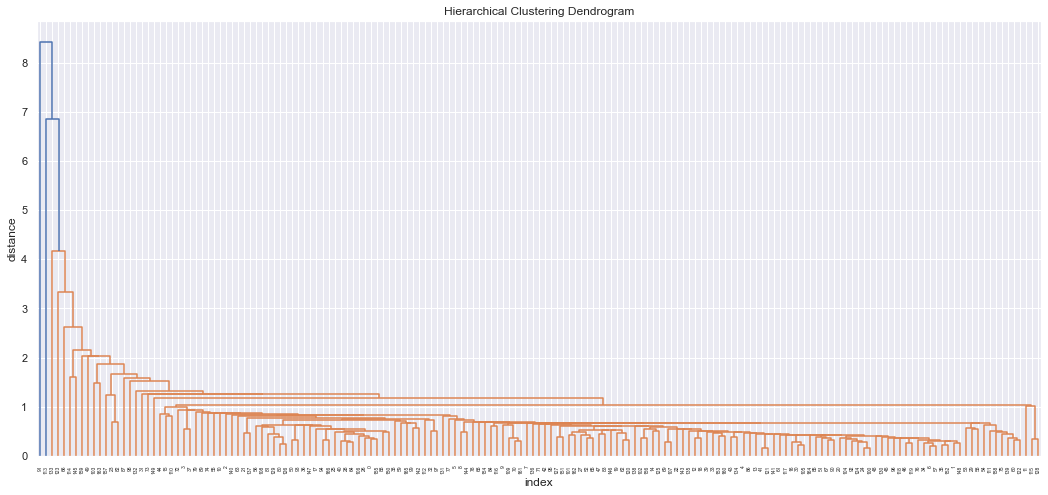

In [36]:
# single linkage: : Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_s = linkage(ngo_scaled, method="single", metric='euclidean')
dendrogram(mergings_s)
plt.show()

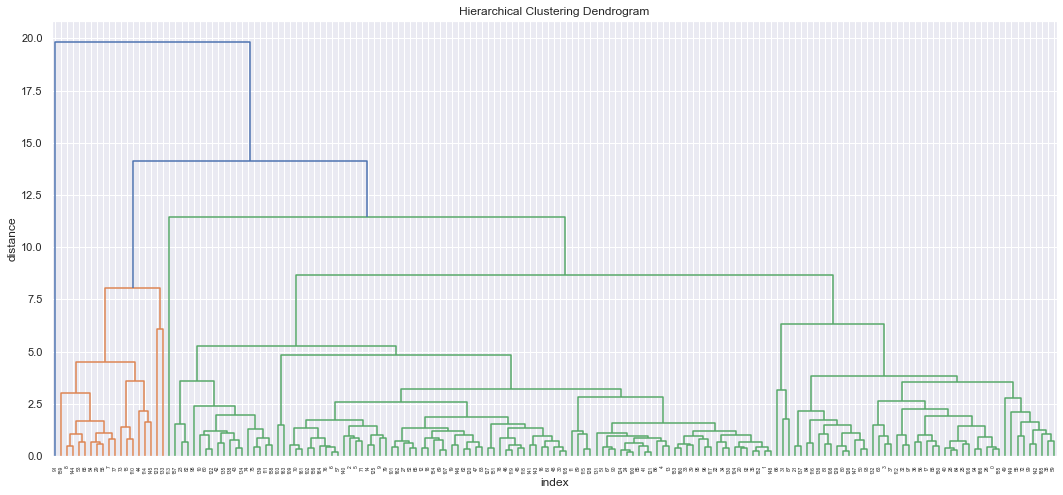

In [37]:
# complete linkage : Here, the distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters.

plt.figure(figsize=(18, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')
mergings_c = linkage(ngo_scaled, method="complete", metric='euclidean')
dendrogram(mergings_c)
plt.show()

NOTE: From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. So we will use Complete linkage output for our further analysis. We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.

# First Iteration - Using 3 Clusters

In [38]:
# 3 clusters
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
ngo.head()

country  child_mort   exports   health   imports  income  \
0  Afghanistan         90.2000     55.3000   41.9174  248.2970   1610     
1  Albania             16.6000     1145.2000 267.8950 1987.7400  9930     
2  Algeria             27.3000     1712.6400 185.9820 1400.4400  12900    
3  Angola              119.0000    2199.1900 100.6050 1514.3700  5900     
4  Antigua and Barbuda 10.3000     5551.0000 735.6600 7185.8000  19100    

   inflation  life_expec  total_fer   gdpp  
0 9.4400     56.2000     5.8200      553    
1 4.4900     76.3000     1.6500      4090   
2 16.1000    76.5000     2.8900      4460   
3 22.4000    60.1000     6.1600      3530   
4 1.4400     76.8000     2.1300      12200

In [40]:
# Create a new datafame with cluster labels to it.
ngo_country_h = ngo.copy()
ngo_country_h['cluster_labels_3'] = cluster_labels_3

ngo_country_h.head()

country  child_mort   exports   health   imports  income  \
0  Afghanistan         90.2000     55.3000   41.9174  248.2970   1610     
1  Albania             16.6000     1145.2000 267.8950 1987.7400  9930     
2  Algeria             27.3000     1712.6400 185.9820 1400.4400  12900    
3  Angola              119.0000    2199.1900 100.6050 1514.3700  5900     
4  Antigua and Barbuda 10.3000     5551.0000 735.6600 7185.8000  19100    

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  
0 9.4400     56.2000     5.8200      553    0                 
1 4.4900     76.3000     1.6500      4090   0                 
2 16.1000    76.5000     2.8900      4460   0                 
3 22.4000    60.1000     6.1600      3530   0                 
4 1.4400     76.8000     2.1300      12200  0

In [41]:
ngo_country_h.shape

(167, 11)

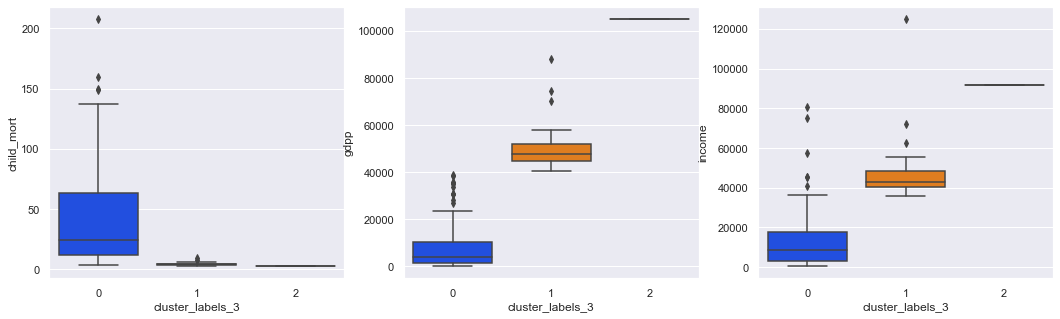

In [42]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_3', y='child_mort', data=ngo_country_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_3', y='gdpp', data=ngo_country_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_3', y='income', data=ngo_country_h, palette="bright")

plt.show()

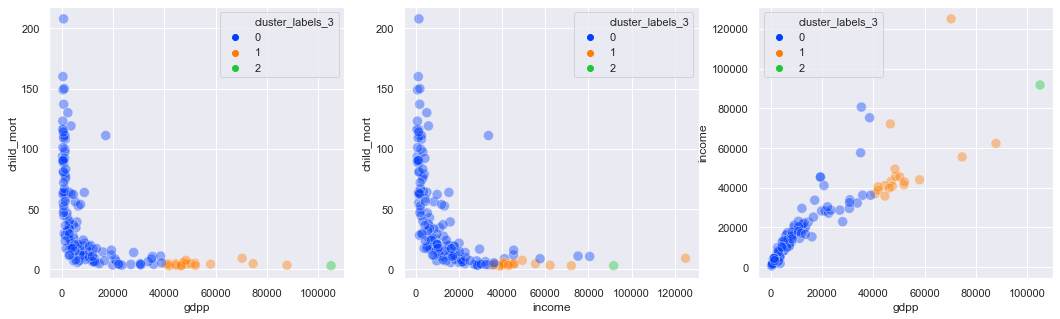

In [43]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_3',
                data=ngo_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_3',
                data=ngo_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_3',
                data=ngo_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [44]:
# Checking cluster count

ngo_country_h.cluster_labels_3.value_counts()

0    148
1    18 
2    1  
Name: cluster_labels_3, dtype: int64

In [45]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

ngo_country_h[ngo_country_h['cluster_labels_3'] == 2]

country  child_mort     exports    health     imports  income  \
91  Luxembourg 2.8000      183750.0000 8158.5000 149100.0000  91700    

    inflation  life_expec  total_fer    gdpp  cluster_labels_3  
91 3.6200     81.3000     1.6300      105000  2

In [46]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

ngo_country_h[ngo_country_h['cluster_labels_3'] == 1]

country  child_mort    exports    health    imports  income  \
7    Australia     4.8000      10276.2000 4530.8700 10847.1000  41400    
8    Austria       4.3000      24059.7000 5159.0000 22418.2000  43200    
15   Belgium       4.5000      33921.6000 4750.8000 33166.8000  41100    
29   Canada        5.6000      13793.4000 5356.2000 14694.0000  40700    
44   Denmark       4.1000      29290.0000 6612.0000 25288.0000  44000    
53   Finland       3.0000      17879.4000 4134.9000 17278.8000  39800    
54   France        4.2000      10880.8000 4831.4000 11408.6000  36900    
58   Germany       4.2000      17681.4000 4848.8000 15507.8000  40400    
68   Iceland       2.6000      22374.6000 3938.6000 18142.7000  38800    
73   Ireland       4.2000      50161.0000 4475.5300 42125.5000  45700    
77   Japan         3.2000      6675.0000  4223.0500 6052.0000   35800    
110  Netherlands   4.5000      36216.0000 5985.7000 31990.8000  45500    
114  Norway        3.2000      34856.6000 8323.4400 25023.0000  62300    
123  Qatar         9.0000      43796.9000 1272.4300 16731.4000  125000   
133  Singapore     2.8000      93200.0000 1845.3600 81084.0000  72100    
144  Sweden        3.0000      24070.2000 5017.2300 21204.7000  42900    
145  Switzerland   4.5000      47744.0000 8579.0000 39761.8000  55500    
159  United States 7.3000      6001.6000  8663.6000 7647.2000   49400    

     inflation  life_expec  total_fer   gdpp  cluster_labels_3  
7   1.1600     82.0000     1.9300      51900  1                 
8   0.8730     80.5000     1.4400      46900  1                 
15  1.8800     80.0000     1.8600      44400  1                 
29  2.8700     81.3000     1.6300      47400  1                 
44  3.2200     79.5000     1.8700      58000  1                 
53  0.3510     80.0000     1.8700      46200  1                 
54  1.0500     81.4000     2.0300      40600  1                 
58  0.7580     80.1000     1.3900      41800  1                 
68  5.4700     82.0000     2.2000      41900  1                 
73  -3.2200    80.4000     2.0500      48700  1                 
77  -1.9000    82.8000     1.3900      44500  1                 
110 0.8480     80.7000     1.7900      50300  1                 
114 5.9500     81.0000     1.9500      87800  1                 
123 6.9800     79.5000     2.0700      70300  1                 
133 -0.0460    82.7000     1.1500      46600  1                 
144 0.9910     81.5000     1.9800      52100  1                 
145 0.3170     82.2000     1.5200      74600  1                 
159 1.2200     78.7000     1.9300      48400  1

Cluster 1 & 2 seems to be Developed or Developing countries, so our segmentation is good in terms of all our under developed countries are segmented under cluster 0. We will further fine tune this cluster.

# Second Iteration - Using 4 Clusters

In [47]:
# 4 clusters
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [48]:
ngo_country_h['cluster_labels_4'] = cluster_labels_4

ngo_country_h.head()

country  child_mort   exports   health   imports  income  \
0  Afghanistan         90.2000     55.3000   41.9174  248.2970   1610     
1  Albania             16.6000     1145.2000 267.8950 1987.7400  9930     
2  Algeria             27.3000     1712.6400 185.9820 1400.4400  12900    
3  Angola              119.0000    2199.1900 100.6050 1514.3700  5900     
4  Antigua and Barbuda 10.3000     5551.0000 735.6600 7185.8000  19100    

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  cluster_labels_4  
0 9.4400     56.2000     5.8200      553    0                 0                 
1 4.4900     76.3000     1.6500      4090   0                 0                 
2 16.1000    76.5000     2.8900      4460   0                 0                 
3 22.4000    60.1000     6.1600      3530   0                 0                 
4 1.4400     76.8000     2.1300      12200  0                 0

In [49]:
ngo_country_h.shape

(167, 12)

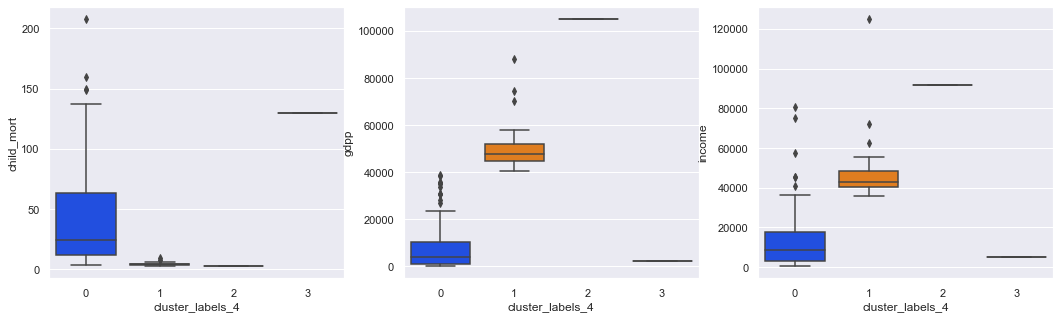

In [50]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_4', y='child_mort', data=ngo_country_h, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_4', y='gdpp', data=ngo_country_h, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_4', y='income', data=ngo_country_h, palette="bright")

plt.show()

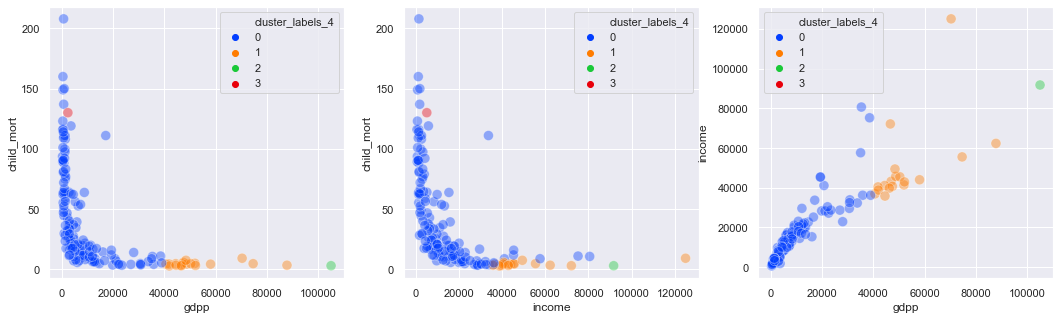

In [51]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_4',
                data=ngo_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_4',
                data=ngo_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_4',
                data=ngo_country_h, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [52]:
ngo_country_h.cluster_labels_4.value_counts()

0    147
1    18 
3    1  
2    1  
Name: cluster_labels_4, dtype: int64

In [53]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

ngo_country_h[ngo_country_h['cluster_labels_4'] == 2]

country  child_mort     exports    health     imports  income  \
91  Luxembourg 2.8000      183750.0000 8158.5000 149100.0000  91700    

    inflation  life_expec  total_fer    gdpp  cluster_labels_3  \
91 3.6200     81.3000     1.6300      105000  2                  

    cluster_labels_4  
91  2

In [54]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

ngo_country_h[ngo_country_h['cluster_labels_4'] == 3]

country  child_mort  exports   health  imports  income  inflation  \
113  Nigeria 130.0000    589.4900 118.1310 405.4200  5150   104.0000     

     life_expec  total_fer  gdpp  cluster_labels_3  cluster_labels_4  
113 60.5000     5.8400      2330  0                 3

In [55]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

ngo_country_h[ngo_country_h['cluster_labels_4'] == 1]

country  child_mort    exports    health    imports  income  \
7    Australia     4.8000      10276.2000 4530.8700 10847.1000  41400    
8    Austria       4.3000      24059.7000 5159.0000 22418.2000  43200    
15   Belgium       4.5000      33921.6000 4750.8000 33166.8000  41100    
29   Canada        5.6000      13793.4000 5356.2000 14694.0000  40700    
44   Denmark       4.1000      29290.0000 6612.0000 25288.0000  44000    
53   Finland       3.0000      17879.4000 4134.9000 17278.8000  39800    
54   France        4.2000      10880.8000 4831.4000 11408.6000  36900    
58   Germany       4.2000      17681.4000 4848.8000 15507.8000  40400    
68   Iceland       2.6000      22374.6000 3938.6000 18142.7000  38800    
73   Ireland       4.2000      50161.0000 4475.5300 42125.5000  45700    
77   Japan         3.2000      6675.0000  4223.0500 6052.0000   35800    
110  Netherlands   4.5000      36216.0000 5985.7000 31990.8000  45500    
114  Norway        3.2000      34856.6000 8323.4400 25023.0000  62300    
123  Qatar         9.0000      43796.9000 1272.4300 16731.4000  125000   
133  Singapore     2.8000      93200.0000 1845.3600 81084.0000  72100    
144  Sweden        3.0000      24070.2000 5017.2300 21204.7000  42900    
145  Switzerland   4.5000      47744.0000 8579.0000 39761.8000  55500    
159  United States 7.3000      6001.6000  8663.6000 7647.2000   49400    

     inflation  life_expec  total_fer   gdpp  cluster_labels_3  \
7   1.1600     82.0000     1.9300      51900  1                  
8   0.8730     80.5000     1.4400      46900  1                  
15  1.8800     80.0000     1.8600      44400  1                  
29  2.8700     81.3000     1.6300      47400  1                  
44  3.2200     79.5000     1.8700      58000  1                  
53  0.3510     80.0000     1.8700      46200  1                  
54  1.0500     81.4000     2.0300      40600  1                  
58  0.7580     80.1000     1.3900      41800  1                  
68  5.4700     82.0000     2.2000      41900  1                  
73  -3.2200    80.4000     2.0500      48700  1                  
77  -1.9000    82.8000     1.3900      44500  1                  
110 0.8480     80.7000     1.7900      50300  1                  
114 5.9500     81.0000     1.9500      87800  1                  
123 6.9800     79.5000     2.0700      70300  1                  
133 -0.0460    82.7000     1.1500      46600  1                  
144 0.9910     81.5000     1.9800      52100  1                  
145 0.3170     82.2000     1.5200      74600  1                  
159 1.2200     78.7000     1.9300      48400  1                  

     cluster_labels_4  
7    1                 
8    1                 
15   1                 
29   1                 
44   1                 
53   1                 
54   1                 
58   1                 
68   1                 
73   1                 
77   1                 
110  1                 
114  1                 
123  1                 
133  1                 
144  1                 
145  1                 
159  1

Inference: From the above 2 iterations of Hierarchical Clustering, it is evident that 3 CLUSTERS is ideal number of clusters, because when we used 4 clusters, we could see that Nigeria was added as a seperate segment. Since Nigera could be a possible candidate for financial aid in terms of their child mortality rate, we will consider the ideal number of cluster to be 3. We will further validate with other methods below.

# Interpreting the Clusters from Hierarchical model

In [56]:
#New dataframe for group by & analysis
ngo_country_h_analysis =  ngo_country_h.groupby(['cluster_labels_3']).mean()
ngo_country_h_analysis

child_mort     exports    health     imports     income  \
cluster_labels_3                                                            
0                42.6304     3598.7496   511.9462  3451.2324   12641.6419   
1                4.3889      29048.8000  5141.5506 24465.1333  50027.7778   
2                2.8000      183750.0000 8158.5000 149100.0000 91700.0000   

                  inflation  life_expec  total_fer        gdpp  \
cluster_labels_3                                                 
0                8.5620     69.2243     3.0989     7551.4459     
1                1.5984     80.9056     1.7806     52355.5556    
2                3.6200     81.3000     1.6300     105000.0000   

                  cluster_labels_4  
cluster_labels_3                    
0                0.0203             
1                1.0000             
2                2.0000

In [57]:
# Creating a new field for count of observations in each cluster
ngo_country_h_analysis['Observations']=ngo_country_h[['cluster_labels_3','child_mort']].groupby(['cluster_labels_3']).count()
ngo_country_h_analysis

child_mort     exports    health     imports     income  \
cluster_labels_3                                                            
0                42.6304     3598.7496   511.9462  3451.2324   12641.6419   
1                4.3889      29048.8000  5141.5506 24465.1333  50027.7778   
2                2.8000      183750.0000 8158.5000 149100.0000 91700.0000   

                  inflation  life_expec  total_fer        gdpp  \
cluster_labels_3                                                 
0                8.5620     69.2243     3.0989     7551.4459     
1                1.5984     80.9056     1.7806     52355.5556    
2                3.6200     81.3000     1.6300     105000.0000   

                  cluster_labels_4  Observations  
cluster_labels_3                                  
0                0.0203             148           
1                1.0000             18            
2                2.0000             1

In [58]:
# Creating a new field for proportion of observations in each cluster
ngo_country_h_analysis['Proportion']=round(ngo_country_h_analysis['Observations']/ngo_country_h_analysis['Observations'].sum(),2)
ngo_country_h_analysis

child_mort     exports    health     imports     income  \
cluster_labels_3                                                            
0                42.6304     3598.7496   511.9462  3451.2324   12641.6419   
1                4.3889      29048.8000  5141.5506 24465.1333  50027.7778   
2                2.8000      183750.0000 8158.5000 149100.0000 91700.0000   

                  inflation  life_expec  total_fer        gdpp  \
cluster_labels_3                                                 
0                8.5620     69.2243     3.0989     7551.4459     
1                1.5984     80.9056     1.7806     52355.5556    
2                3.6200     81.3000     1.6300     105000.0000   

                  cluster_labels_4  Observations  Proportion  
cluster_labels_3                                              
0                0.0203             148          0.8900       
1                1.0000             18           0.1100       
2                2.0000             1            0.0100

<Figure size 576x360 with 0 Axes>

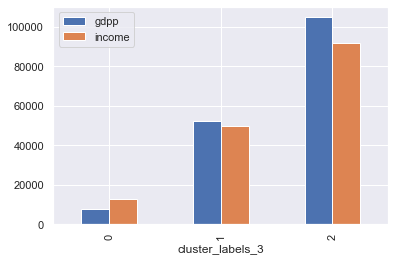

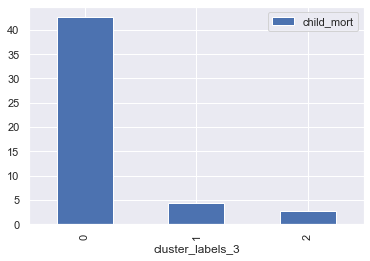

In [59]:
plt.figure(figsize=(8, 5))
ngo_country_h_plot1=ngo_country_h[['cluster_labels_3','gdpp','income']].copy()
ngo_country_h_plot1=ngo_country_h_plot1.groupby('cluster_labels_3').mean()
ngo_country_h_plot1.plot.bar()

ngo_country_h_plot2=ngo_country_h[['cluster_labels_3','child_mort']].copy()
ngo_country_h_plot2=ngo_country_h_plot2.groupby('cluster_labels_3').mean()
ngo_country_h_plot2.plot.bar()

Interpretation of Clusters: Cluster 0 has the Highest average Child Mortality rate of ~42 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 7551 & 12641 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 0 comprises of ~89% of overall data, and has ~148 observations in comparision to 167 total observations This seems to be a problem. This means that Hierarchical clustering is not giving us a good result as 89% of the data points are segmented into that cluster. We also saw that increasing the cluster number is not solving this problem. We will perform K-Means Clustering and check how that turns out to be.

# Finding the Optimal Number of Clusters

# SSD (Elbow Curve)

In [60]:
#Checking the dataframe
ngo_scaled.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0 1.2915      -0.4110  -0.5650 -0.4323  -0.8082 0.1573     -1.6191       
1 -0.5389     -0.3502  -0.4392 -0.3137  -0.3754 -0.3123    0.6479        
2 -0.2728     -0.3185  -0.4848 -0.3537  -0.2208 0.7893     0.6704        
3 2.0078      -0.2914  -0.5324 -0.3460  -0.5850 1.3871     -1.1792       
4 -0.6956     -0.1043  -0.1788 0.0407   0.1017  -0.6017    0.7043        

   total_fer    gdpp  
0 1.9029     -0.6792  
1 -0.8600    -0.4856  
2 -0.0384    -0.4654  
3 2.1282     -0.5163  
4 -0.5419    -0.0418

In [61]:
ngo_scaled.shape

(167, 9)

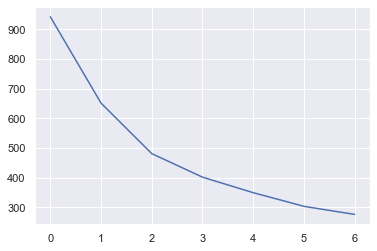

In [62]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ngo_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

# Silhouette Analysis

# silhouette score=(p−q)/max(p,q)

p  is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

The value of the silhouette score range lies between -1 to 1.

A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [63]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(ngo_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(ngo_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.43347478209451806
For n_clusters=6, the silhouette score is 0.3927936961757552
For n_clusters=7, the silhouette score is 0.30348777974604735
For n_clusters=8, the silhouette score is 0.3076966515322328


Inference: From the above validations(Elbow Curve & silhouette analysis), we could see that 3,4 or 5 clusters are optimal number of clusters to be used. We will try 3 different iterations in K-Means clustering using 3,4 and 5 Clusters and analyse the results

# K-Means Clustering

# First Iteration - Using 3 Clusters

In [64]:
# K Means with with k=3
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_3.fit(ngo_scaled)

KMeans(max_iter=500, n_clusters=3, random_state=335)

In [65]:
kmeans_3.labels_

array([2, 0, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 1, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 1, 0,
       1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 2, 0, 1, 2, 0, 0, 0, 2, 2, 0,
       2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2])

In [66]:
# Create a new datafame with scaled data and adding country name to it.
ngo_country_k = ngo_country_h.copy()
ngo_country_k.head()

country  child_mort   exports   health   imports  income  \
0  Afghanistan         90.2000     55.3000   41.9174  248.2970   1610     
1  Albania             16.6000     1145.2000 267.8950 1987.7400  9930     
2  Algeria             27.3000     1712.6400 185.9820 1400.4400  12900    
3  Angola              119.0000    2199.1900 100.6050 1514.3700  5900     
4  Antigua and Barbuda 10.3000     5551.0000 735.6600 7185.8000  19100    

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  cluster_labels_4  
0 9.4400     56.2000     5.8200      553    0                 0                 
1 4.4900     76.3000     1.6500      4090   0                 0                 
2 16.1000    76.5000     2.8900      4460   0                 0                 
3 22.4000    60.1000     6.1600      3530   0                 0                 
4 1.4400     76.8000     2.1300      12200  0                 0

In [67]:
ngo_country_k.shape

(167, 12)

In [68]:
# assign the label
ngo_country_k['cluster_id_3'] = kmeans_3.labels_
ngo_country_k.head()

country  child_mort   exports   health   imports  income  \
0  Afghanistan         90.2000     55.3000   41.9174  248.2970   1610     
1  Albania             16.6000     1145.2000 267.8950 1987.7400  9930     
2  Algeria             27.3000     1712.6400 185.9820 1400.4400  12900    
3  Angola              119.0000    2199.1900 100.6050 1514.3700  5900     
4  Antigua and Barbuda 10.3000     5551.0000 735.6600 7185.8000  19100    

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  \
0 9.4400     56.2000     5.8200      553    0                  
1 4.4900     76.3000     1.6500      4090   0                  
2 16.1000    76.5000     2.8900      4460   0                  
3 22.4000    60.1000     6.1600      3530   0                  
4 1.4400     76.8000     2.1300      12200  0                  

   cluster_labels_4  cluster_id_3  
0  0                 2             
1  0                 0             
2  0                 0             
3  0                 2             
4  0                 0

In [69]:
# Checking the number of countries in each cluster

ngo_country_k.cluster_id_3.value_counts()

0    91
2    48
1    28
Name: cluster_id_3, dtype: int64

# Visualizing the Clustered Data

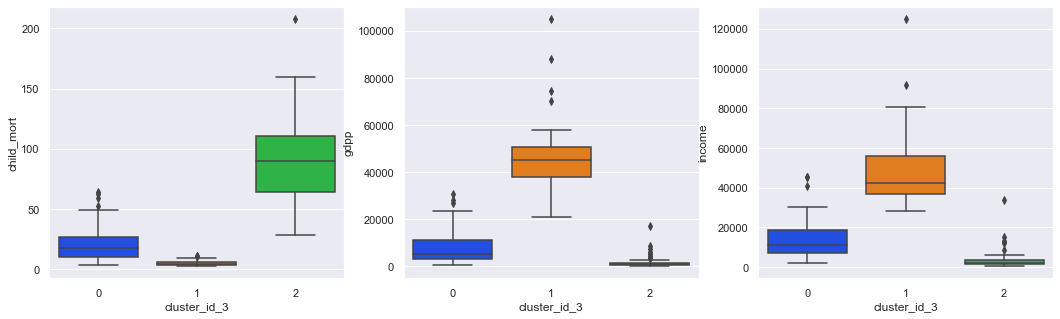

In [70]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_3', y='child_mort',
            data=ngo_country_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_3', y='gdpp',
            data=ngo_country_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_3', y='income',
            data=ngo_country_k, palette="bright")

plt.show()

In [71]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_3',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_3',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_3',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [72]:
# Checking the CLuster means:
ngo_country_k.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

child_mort    exports    health    imports     income  \
cluster_id_3                                                          
2            91.6104     879.0635   114.8218  827.0288   3897.3542    
0            20.3571     3604.1494  547.2795  3710.4464  13968.0220   
1            5.0464      31038.2393 4327.1632 25818.1000 50178.5714   

              inflation  life_expec  total_fer       gdpp  cluster_labels_3  \
cluster_id_3                                                                  
2            11.9111    59.2396     4.9921     1909.2083  0.0000              
0            7.0705     73.4604     2.2351     7979.9121  0.0000              
1            3.0147     80.5143     1.7607     48114.2857 0.7143              

              cluster_labels_4  
cluster_id_3                    
2            0.0625             
0            0.0000             
1            0.7143

Inference: Cluster 2 & Cluster 0 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome

In [73]:
# Checking the countries in Cluster 2 to see which are the countries in that segment.

ngo_country_k[['country','child_mort','income','gdpp']][ngo_country_k['cluster_id_3'] == 2].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
66   Haiti                    208.0000     1500    662  
132  Sierra Leone             160.0000     1220    399  
32   Chad                     150.0000     1930    897  
31   Central African Republic 149.0000     888     446  
97   Mali                     137.0000     1870    708  
113  Nigeria                  130.0000     5150    2330 
112  Niger                    123.0000     814     348  
3    Angola                   119.0000     5900    3530 
37   Congo, Dem. Rep.         116.0000     609     334  
25   Burkina Faso             116.0000     1430    575  
64   Guinea-Bissau            114.0000     1390    547  
17   Benin                    111.0000     1820    758  
40   Cote d'Ivoire            111.0000     2690    1220 
49   Equatorial Guinea        111.0000     33700   17100
63   Guinea                   109.0000     1190    648  
28   Cameroon                 108.0000     2660    1310 
106  Mozambique               101.0000     918     419  
87   Lesotho                  99.7000      2380    1170 
99   Mauritania               97.4000      3320    1200 
26   Burundi                  93.6000      764     231  
116  Pakistan                 92.1000      4280    1040 
94   Malawi                   90.5000      1030    459  
150  Togo                     90.3000      1210    488  
0    Afghanistan              90.2000      1610    553  
88   Liberia                  89.3000      700     327  
36   Comoros                  88.2000      1410    769  
166  Zambia                   83.1000      3280    1460 
155  Uganda                   81.0000      1540    595  
56   Gambia                   80.3000      1660    562  
84   Lao                      78.9000      3980    1140 
142  Sudan                    76.7000      3370    1480 
59   Ghana                    74.7000      3060    1310 
147  Tanzania                 71.9000      2090    702  
129  Senegal                  66.8000      2180    1000 
38   Congo, Rep.              63.9000      5190    2740 
55   Gabon                    63.7000      15400   8750 
126  Rwanda                   63.6000      1350    563  
81   Kiribati                 62.7000      1730    1490 
149  Timor-Leste              62.6000      1850    3600 
93   Madagascar               62.2000      1390    413  
80   Kenya                    62.2000      2480    967  
165  Yemen                    56.3000      4480    1310 
108  Namibia                  56.0000      8460    5190 
50   Eritrea                  55.2000      1420    482  
137  South Africa             53.7000      12000   7280 
21   Botswana                 52.5000      13300   6350 
72   Iraq                     36.9000      12700   4500 
136  Solomon Islands          28.1000      1780    1290

In [74]:
# Checking the countries in Cluster 0 to see which are the countries in that segment.

ngo_country_h[['country','child_mort','income','gdpp']][ngo_country_k['cluster_id_3'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
107  Myanmar        64.4000      3720    988  
154  Turkmenistan   62.0000      9940    4440 
69   India          58.8000      4410    1350 
146  Tajikistan     52.4000      2110    738  
12   Bangladesh     49.4000      2440    758  
..          ...         ...       ...    ...  
138  South Korea    4.1000       30400   22100
122  Portugal       3.9000       27200   22500
60   Greece         3.9000       28700   26900
43   Czech Republic 3.4000       28300   19800
135  Slovenia       3.2000       28700   23400

[91 rows x 4 columns]

# Second Iteration - Using 4 Clusters

In [75]:
# K Means with with k=4
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_4.fit(ngo_scaled)

KMeans(max_iter=500, n_clusters=4, random_state=335)

In [76]:
kmeans_4.labels_

array([3, 1, 1, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 3,
       1, 2, 1, 3, 3, 1, 3, 2, 1, 3, 3, 1, 1, 1, 3, 3, 3, 1, 3, 1, 2, 1,
       2, 1, 1, 1, 1, 3, 3, 1, 1, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 3, 3, 1,
       3, 1, 2, 1, 1, 1, 3, 2, 2, 2, 1, 2, 1, 1, 3, 3, 2, 1, 3, 1, 1, 3,
       3, 1, 1, 0, 1, 3, 3, 1, 1, 3, 2, 3, 1, 1, 1, 1, 1, 1, 3, 1, 3, 1,
       2, 2, 3, 3, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1, 1, 3, 1, 1,
       3, 0, 1, 2, 3, 3, 1, 2, 1, 1, 3, 1, 2, 2, 1, 3, 1, 3, 3, 1, 1, 1,
       1, 3, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3])

In [77]:
# assign the label
ngo_country_k['cluster_id_4'] = kmeans_4.labels_
ngo_country_k.head()

country  child_mort   exports   health   imports  income  \
0  Afghanistan         90.2000     55.3000   41.9174  248.2970   1610     
1  Albania             16.6000     1145.2000 267.8950 1987.7400  9930     
2  Algeria             27.3000     1712.6400 185.9820 1400.4400  12900    
3  Angola              119.0000    2199.1900 100.6050 1514.3700  5900     
4  Antigua and Barbuda 10.3000     5551.0000 735.6600 7185.8000  19100    

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  \
0 9.4400     56.2000     5.8200      553    0                  
1 4.4900     76.3000     1.6500      4090   0                  
2 16.1000    76.5000     2.8900      4460   0                  
3 22.4000    60.1000     6.1600      3530   0                  
4 1.4400     76.8000     2.1300      12200  0                  

   cluster_labels_4  cluster_id_3  cluster_id_4  
0  0                 2             3             
1  0                 0             1             
2  0                 0             1             
3  0                 2             3             
4  0                 0             1

In [78]:
# Checking the number of countries in each cluster

ngo_country_k.cluster_id_4.value_counts()

1    87
3    48
2    30
0    2 
Name: cluster_id_4, dtype: int64

# Visualizing the Clustered Data

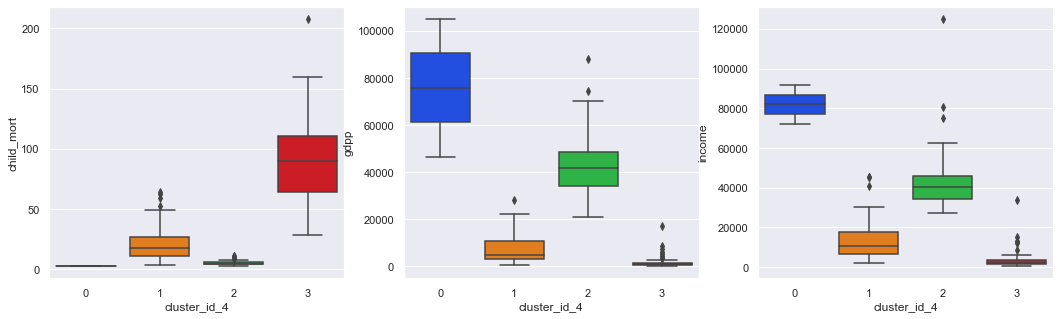

In [79]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_4', y='child_mort',
            data=ngo_country_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_4', y='gdpp',
            data=ngo_country_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_4', y='income',
            data=ngo_country_k, palette="bright")

plt.show()

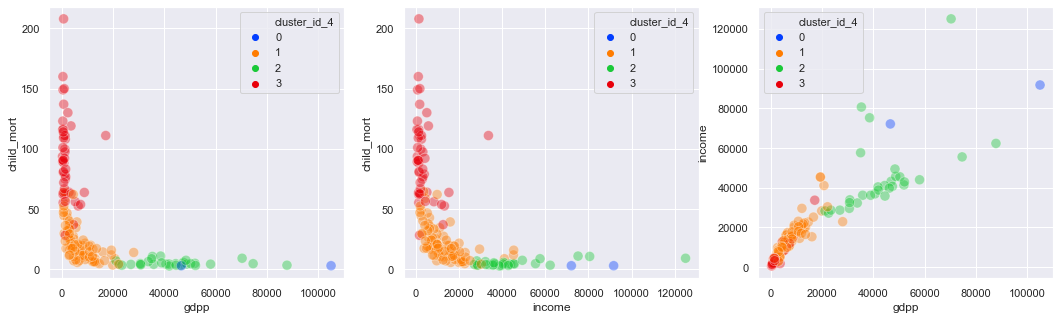

In [80]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_4',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_4',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_4',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [81]:
# Checking the CLuster means:
ngo_country_k.groupby(['cluster_id_4']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

child_mort     exports    health     imports     income  \
cluster_id_4                                                            
3            91.6104     879.0635    114.8218  827.0288    3897.3542    
1            21.1138     3328.1494   460.0001  3404.4979   13297.5862   
2            5.0433      21018.3100  4031.3043 17806.0700  45180.0000   
0            2.8000      138475.0000 5001.9300 115092.0000 81900.0000   

              inflation  life_expec  total_fer       gdpp  cluster_labels_3  \
cluster_id_4                                                                  
3            11.9111    59.2396     4.9921     1909.2083  0.0000              
1            7.3715     73.1471     2.2520     7158.2989  0.0000              
2            2.7645     80.3833     1.7997     43300.0000 0.5667              
0            1.7870     82.0000     1.3900     75800.0000 1.5000              

              cluster_labels_4  cluster_id_3  
cluster_id_4                                  
3            0.0625            2.0000         
1            0.0000            0.0000         
2            0.5667            0.8667         
0            1.5000            1.0000

Inference: Cluster 3 & Cluster 1 seems to have highest Child Mortality and lowest Income & GDPP. Lets check the countries in these clusters to see there outcome

In [82]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

ngo_country_k[['country','child_mort','income','gdpp']][ngo_country_k['cluster_id_4'] == 3].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
66   Haiti                    208.0000     1500    662  
132  Sierra Leone             160.0000     1220    399  
32   Chad                     150.0000     1930    897  
31   Central African Republic 149.0000     888     446  
97   Mali                     137.0000     1870    708  
113  Nigeria                  130.0000     5150    2330 
112  Niger                    123.0000     814     348  
3    Angola                   119.0000     5900    3530 
37   Congo, Dem. Rep.         116.0000     609     334  
25   Burkina Faso             116.0000     1430    575  
64   Guinea-Bissau            114.0000     1390    547  
17   Benin                    111.0000     1820    758  
40   Cote d'Ivoire            111.0000     2690    1220 
49   Equatorial Guinea        111.0000     33700   17100
63   Guinea                   109.0000     1190    648  
28   Cameroon                 108.0000     2660    1310 
106  Mozambique               101.0000     918     419  
87   Lesotho                  99.7000      2380    1170 
99   Mauritania               97.4000      3320    1200 
26   Burundi                  93.6000      764     231  
116  Pakistan                 92.1000      4280    1040 
94   Malawi                   90.5000      1030    459  
150  Togo                     90.3000      1210    488  
0    Afghanistan              90.2000      1610    553  
88   Liberia                  89.3000      700     327  
36   Comoros                  88.2000      1410    769  
166  Zambia                   83.1000      3280    1460 
155  Uganda                   81.0000      1540    595  
56   Gambia                   80.3000      1660    562  
84   Lao                      78.9000      3980    1140 
142  Sudan                    76.7000      3370    1480 
59   Ghana                    74.7000      3060    1310 
147  Tanzania                 71.9000      2090    702  
129  Senegal                  66.8000      2180    1000 
38   Congo, Rep.              63.9000      5190    2740 
55   Gabon                    63.7000      15400   8750 
126  Rwanda                   63.6000      1350    563  
81   Kiribati                 62.7000      1730    1490 
149  Timor-Leste              62.6000      1850    3600 
93   Madagascar               62.2000      1390    413  
80   Kenya                    62.2000      2480    967  
165  Yemen                    56.3000      4480    1310 
108  Namibia                  56.0000      8460    5190 
50   Eritrea                  55.2000      1420    482  
137  South Africa             53.7000      12000   7280 
21   Botswana                 52.5000      13300   6350 
72   Iraq                     36.9000      12700   4500 
136  Solomon Islands          28.1000      1780    1290

In [83]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

ngo_country_k[['country','child_mort','income','gdpp']][ngo_country_k['cluster_id_4'] == 1].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
107  Myanmar        64.4000      3720    988  
154  Turkmenistan   62.0000      9940    4440 
69   India          58.8000      4410    1350 
146  Tajikistan     52.4000      2110    738  
12   Bangladesh     49.4000      2440    758  
..          ...         ...       ...    ...  
14   Belarus        5.5000       16200   6030 
41   Croatia        5.5000       20100   13500
51   Estonia        4.5000       22700   14600
138  South Korea    4.1000       30400   22100
43   Czech Republic 3.4000       28300   19800

[87 rows x 4 columns]

# Third Iteration - Using 5 Clusters

In [84]:
# K Means with with k=4
kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 335)
kmeans_5.fit(ngo_scaled)

KMeans(max_iter=500, n_clusters=5, random_state=335)

In [85]:
kmeans_5.labels_

array([0, 3, 3, 0, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 0, 3, 3, 3, 0,
       3, 1, 3, 0, 0, 3, 0, 1, 3, 0, 0, 3, 3, 3, 0, 0, 0, 3, 0, 3, 1, 3,
       1, 3, 3, 3, 3, 0, 0, 3, 3, 1, 1, 0, 0, 3, 1, 0, 1, 3, 3, 0, 0, 3,
       0, 3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 3, 3, 0, 0, 1, 3, 0, 3, 3, 0,
       0, 3, 3, 2, 3, 0, 0, 3, 3, 0, 1, 0, 3, 3, 3, 3, 3, 3, 0, 3, 0, 3,
       1, 1, 0, 4, 1, 3, 0, 3, 3, 3, 3, 3, 3, 1, 3, 3, 0, 3, 3, 0, 3, 3,
       0, 1, 3, 1, 0, 0, 3, 1, 3, 3, 0, 3, 1, 1, 3, 0, 3, 0, 0, 3, 3, 3,
       3, 0, 3, 1, 1, 1, 3, 3, 3, 3, 3, 0, 0])

In [86]:
# assign the label
ngo_country_k['cluster_id_5'] = kmeans_5.labels_
ngo_country_k.head()

country  child_mort   exports   health   imports  income  \
0  Afghanistan         90.2000     55.3000   41.9174  248.2970   1610     
1  Albania             16.6000     1145.2000 267.8950 1987.7400  9930     
2  Algeria             27.3000     1712.6400 185.9820 1400.4400  12900    
3  Angola              119.0000    2199.1900 100.6050 1514.3700  5900     
4  Antigua and Barbuda 10.3000     5551.0000 735.6600 7185.8000  19100    

   inflation  life_expec  total_fer   gdpp  cluster_labels_3  \
0 9.4400     56.2000     5.8200      553    0                  
1 4.4900     76.3000     1.6500      4090   0                  
2 16.1000    76.5000     2.8900      4460   0                  
3 22.4000    60.1000     6.1600      3530   0                  
4 1.4400     76.8000     2.1300      12200  0                  

   cluster_labels_4  cluster_id_3  cluster_id_4  cluster_id_5  
0  0                 2             3             0             
1  0                 0             1             3             
2  0                 0             1             3             
3  0                 2             3             0             
4  0                 0             1             3

In [87]:
# Checking the number of countries in each cluster

ngo_country_k.cluster_id_5.value_counts()

3    88
0    47
1    30
4    1 
2    1 
Name: cluster_id_5, dtype: int64

# Visualizing the Clustered Data

In [88]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_id_5', y='child_mort',
            data=ngo_country_k, palette="bright")
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_id_5', y='gdpp',
            data=ngo_country_k, palette="bright")
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_id_5', y='income',
            data=ngo_country_k, palette="bright")

plt.show()

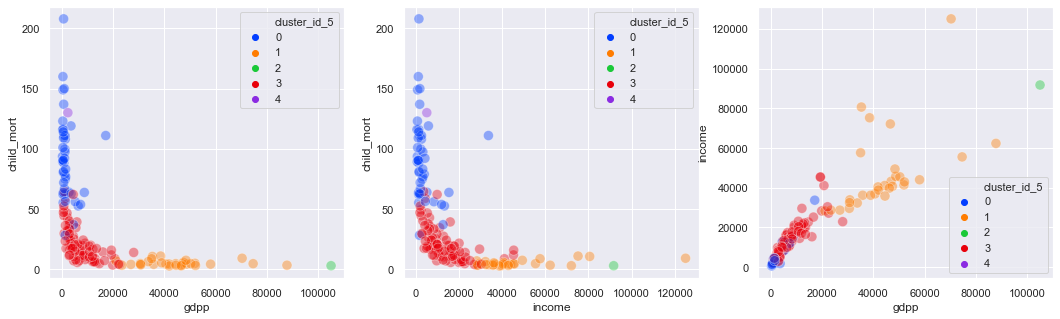

In [89]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_id_5',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_id_5',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_id_5',
                data=ngo_country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()


In [90]:
# Checking the Cluster means:
ngo_country_k.groupby(['cluster_id_5']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

child_mort     exports    health     imports     income  \
cluster_id_5                                                            
4            130.0000    589.4900    118.1310  405.4200    5150.0000    
0            90.7936     885.2247    114.7514  835.9992    3870.7021    
3            20.9182     3366.7784   482.8978  3461.4355   13455.5682   
1            5.0067      23900.7267  4010.3163 20228.3700  46676.6667   
2            2.8000      183750.0000 8158.5000 149100.0000 91700.0000   

              inflation  life_expec  total_fer        gdpp  cluster_labels_3  \
cluster_id_5                                                                   
4            104.0000   60.5000     5.8400     2330.0000   0.0000              
0            9.9518     59.2128     4.9740     1900.2553   0.0000              
3            7.2950     73.2227     2.2422     7332.6364   0.0000              
1            2.7416     80.4800     1.7917     44103.3333  0.6000              
2            3.6200     81.3000     1.6300     105000.0000 2.0000              

              cluster_labels_4  cluster_id_3  cluster_id_4  
cluster_id_5                                                
4            3.0000            2.0000        3.0000         
0            0.0000            2.0000        3.0000         
3            0.0000            0.0000        1.0114         
1            0.6000            0.9000        1.9333         
2            2.0000            1.0000        0.0000

Inference: Cluster 3 & Cluster 1 seems to have highest Child Mortality and lowest Income & GDPP. Let's check the countries in these clusters to see their outcome.

In [91]:
# Checking the countries in Cluster 3 to see which are the countries in that segment.

ngo_country_k[['country','child_mort','income','gdpp']][ngo_country_k['cluster_id_5'] == 4].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income  gdpp
113  Nigeria 130.0000     5150    2330

In [92]:
# Checking the countries in Cluster 1 to see which are the countries in that segment.

ngo_country_k[['country','child_mort','income','gdpp']][ngo_country_k['cluster_id_5'] == 0].sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])

country  child_mort  income   gdpp
66   Haiti                    208.0000     1500    662  
132  Sierra Leone             160.0000     1220    399  
32   Chad                     150.0000     1930    897  
31   Central African Republic 149.0000     888     446  
97   Mali                     137.0000     1870    708  
112  Niger                    123.0000     814     348  
3    Angola                   119.0000     5900    3530 
37   Congo, Dem. Rep.         116.0000     609     334  
25   Burkina Faso             116.0000     1430    575  
64   Guinea-Bissau            114.0000     1390    547  
17   Benin                    111.0000     1820    758  
40   Cote d'Ivoire            111.0000     2690    1220 
49   Equatorial Guinea        111.0000     33700   17100
63   Guinea                   109.0000     1190    648  
28   Cameroon                 108.0000     2660    1310 
106  Mozambique               101.0000     918     419  
87   Lesotho                  99.7000      2380    1170 
99   Mauritania               97.4000      3320    1200 
26   Burundi                  93.6000      764     231  
116  Pakistan                 92.1000      4280    1040 
94   Malawi                   90.5000      1030    459  
150  Togo                     90.3000      1210    488  
0    Afghanistan              90.2000      1610    553  
88   Liberia                  89.3000      700     327  
36   Comoros                  88.2000      1410    769  
166  Zambia                   83.1000      3280    1460 
155  Uganda                   81.0000      1540    595  
56   Gambia                   80.3000      1660    562  
84   Lao                      78.9000      3980    1140 
142  Sudan                    76.7000      3370    1480 
59   Ghana                    74.7000      3060    1310 
147  Tanzania                 71.9000      2090    702  
129  Senegal                  66.8000      2180    1000 
38   Congo, Rep.              63.9000      5190    2740 
55   Gabon                    63.7000      15400   8750 
126  Rwanda                   63.6000      1350    563  
81   Kiribati                 62.7000      1730    1490 
149  Timor-Leste              62.6000      1850    3600 
93   Madagascar               62.2000      1390    413  
80   Kenya                    62.2000      2480    967  
165  Yemen                    56.3000      4480    1310 
108  Namibia                  56.0000      8460    5190 
50   Eritrea                  55.2000      1420    482  
137  South Africa             53.7000      12000   7280 
21   Botswana                 52.5000      13300   6350 
72   Iraq                     36.9000      12700   4500 
136  Solomon Islands          28.1000      1780    1290

# Choosing the model

From the above 3 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL

# Interpreting the Clusters from K-Means model

In [93]:
#New dataframe for group by & analysis

ngo_country_k_analysis =  ngo_country_k.groupby(['cluster_id_3']).mean().sort_values(['child_mort','income','gdpp'],ascending = [False,True,True])
ngo_country_k_analysis

child_mort    exports    health    imports     income  \
cluster_id_3                                                          
2            91.6104     879.0635   114.8218  827.0288   3897.3542    
0            20.3571     3604.1494  547.2795  3710.4464  13968.0220   
1            5.0464      31038.2393 4327.1632 25818.1000 50178.5714   

              inflation  life_expec  total_fer       gdpp  cluster_labels_3  \
cluster_id_3                                                                  
2            11.9111    59.2396     4.9921     1909.2083  0.0000              
0            7.0705     73.4604     2.2351     7979.9121  0.0000              
1            3.0147     80.5143     1.7607     48114.2857 0.7143              

              cluster_labels_4  cluster_id_4  cluster_id_5  
cluster_id_3                                                
2            0.0625            3.0000        0.0833         
0            0.0000            1.0440        2.9341         
1            0.7143            1.8571        1.0357

In [94]:
# Creating a new field for count of observations in each cluster

ngo_country_k_analysis['Observations']=ngo_country_k[['cluster_id_3','child_mort']].groupby(['cluster_id_3']).count()
ngo_country_k_analysis

child_mort    exports    health    imports     income  \
cluster_id_3                                                          
2            91.6104     879.0635   114.8218  827.0288   3897.3542    
0            20.3571     3604.1494  547.2795  3710.4464  13968.0220   
1            5.0464      31038.2393 4327.1632 25818.1000 50178.5714   

              inflation  life_expec  total_fer       gdpp  cluster_labels_3  \
cluster_id_3                                                                  
2            11.9111    59.2396     4.9921     1909.2083  0.0000              
0            7.0705     73.4604     2.2351     7979.9121  0.0000              
1            3.0147     80.5143     1.7607     48114.2857 0.7143              

              cluster_labels_4  cluster_id_4  cluster_id_5  Observations  
cluster_id_3                                                              
2            0.0625            3.0000        0.0833         48            
0            0.0000            1.0440        2.9341         91            
1            0.7143            1.8571        1.0357         28

In [95]:
# Creating a new field for proportion of observations in each cluster

ngo_country_k_analysis['Proportion']=round(ngo_country_k_analysis['Observations']/ngo_country_k_analysis['Observations'].sum(),2)


#Summary View
ngo_country_k_analysis[['child_mort','income','gdpp','Observations','Proportion']]

child_mort     income       gdpp  Observations  Proportion
cluster_id_3                                                            
2            91.6104     3897.3542  1909.2083   48           0.2900     
0            20.3571     13968.0220 7979.9121   91           0.5400     
1            5.0464      50178.5714 48114.2857  28           0.1700

<Figure size 576x360 with 0 Axes>

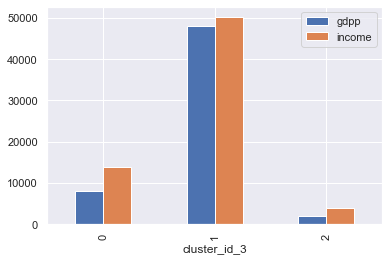

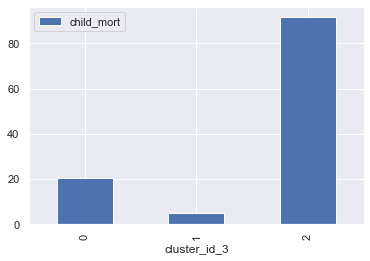

In [96]:
plt.figure(figsize=(8, 5))
ngo_country_k_plot1=ngo_country_k[['cluster_id_3','gdpp','income']].copy()
ngo_country_k_plot1=ngo_country_k_plot1.groupby('cluster_id_3').mean()
ngo_country_k_plot1.plot.bar()

ngo_country_k_plot2=ngo_country_k[['cluster_id_3','child_mort']].copy()
ngo_country_k_plot2=ngo_country_k_plot2.groupby('cluster_id_3').mean()
ngo_country_k_plot2.plot.bar()

Interpretation of Clusters: Cluster 2 has the Highest average Child Mortality rate of ~92 when compared to other 3 clusters, and Lowest average GDPP & Income of ~ 1909 & 3897 respectively. All these figures clearly makes this cluster the best candidate for the financial aid from NGO. We could also see that Cluster 2 comprises of ~29% of overall data, and has ~48 observations in comparision to 167 total observations

# Renaming the Clusters

In [97]:
ngo_country_k_analysis = ngo_country_k_analysis.rename({
    2: 'Under_Developed Countries',
    1: 'Developed Countries',
    0: 'Developing Countries'}).reset_index()

In [98]:
ngo_country_k_analysis[['cluster_id_3','child_mort','income','gdpp','Observations','Proportion']]

cluster_id_3  child_mort     income       gdpp  Observations  \
0  Under_Developed Countries 91.6104     3897.3542  1909.2083   48             
1  Developing Countries      20.3571     13968.0220 7979.9121   91             
2  Developed Countries       5.0464      50178.5714 48114.2857  28             

   Proportion  
0 0.2900       
1 0.5400       
2 0.1700

In [99]:
ngo_country_k_analysis[['cluster_id_4','child_mort','income','gdpp','Observations','Proportion']]

cluster_id_4  child_mort     income       gdpp  Observations  Proportion
0 3.0000        91.6104     3897.3542  1909.2083   48           0.2900     
1 1.0440        20.3571     13968.0220 7979.9121   91           0.5400     
2 1.8571        5.0464      50178.5714 48114.2857  28           0.1700

Final Cluster: From above interpretation of the cluster, renaming all the clusters accordingly. The Cluster 2 now becomes 'Under Developed Countries'. let's further analyse the Cluster 'Under Developed Countries' and get to know various metrics of that data set, based on which we could identify our final set of countries which needs the financial support from the NGO

# Analysing the 'Under Developed Countries' Cluster

In [100]:
ngo_country_k.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'cluster_labels_3',
       'cluster_labels_4', 'cluster_id_3', 'cluster_id_4', 'cluster_id_5'],
      dtype='object')

In [101]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our final cluster data

final_cluster = ngo_country_k[ngo_country_k['cluster_id_3'] == 2].copy()
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]

In [102]:
final_cluster.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

country  child_mort  income   gdpp
26   Burundi                  93.6000      764     231  
88   Liberia                  89.3000      700     327  
37   Congo, Dem. Rep.         116.0000     609     334  
112  Niger                    123.0000     814     348  
132  Sierra Leone             160.0000     1220    399  
93   Madagascar               62.2000      1390    413  
106  Mozambique               101.0000     918     419  
31   Central African Republic 149.0000     888     446  
94   Malawi                   90.5000      1030    459  
50   Eritrea                  55.2000      1420    482  
150  Togo                     90.3000      1210    488  
64   Guinea-Bissau            114.0000     1390    547  
0    Afghanistan              90.2000      1610    553  
56   Gambia                   80.3000      1660    562  
126  Rwanda                   63.6000      1350    563  
25   Burkina Faso             116.0000     1430    575  
155  Uganda                   81.0000      1540    595  
63   Guinea                   109.0000     1190    648  
66   Haiti                    208.0000     1500    662  
147  Tanzania                 71.9000      2090    702  
97   Mali                     137.0000     1870    708  
17   Benin                    111.0000     1820    758  
36   Comoros                  88.2000      1410    769  
32   Chad                     150.0000     1930    897  
80   Kenya                    62.2000      2480    967  
129  Senegal                  66.8000      2180    1000 
116  Pakistan                 92.1000      4280    1040 
84   Lao                      78.9000      3980    1140 
87   Lesotho                  99.7000      2380    1170 
99   Mauritania               97.4000      3320    1200 
40   Cote d'Ivoire            111.0000     2690    1220 
136  Solomon Islands          28.1000      1780    1290 
28   Cameroon                 108.0000     2660    1310 
59   Ghana                    74.7000      3060    1310 
165  Yemen                    56.3000      4480    1310 
166  Zambia                   83.1000      3280    1460 
142  Sudan                    76.7000      3370    1480 
81   Kiribati                 62.7000      1730    1490 
113  Nigeria                  130.0000     5150    2330 
38   Congo, Rep.              63.9000      5190    2740 
3    Angola                   119.0000     5900    3530 
149  Timor-Leste              62.6000      1850    3600 
72   Iraq                     36.9000      12700   4500 
108  Namibia                  56.0000      8460    5190 
21   Botswana                 52.5000      13300   6350 
137  South Africa             53.7000      12000   7280 
55   Gabon                    63.7000      15400   8750 
49   Equatorial Guinea        111.0000     33700   17100

# Decision Making on the final approach

In [103]:
final_cluster.describe()

child_mort     income       gdpp
count 48.0000     48.0000    48.0000   
mean  91.6104     3897.3542  1909.2083 
std   34.3199     5590.1686  2925.9110 
min   28.1000     609.0000   231.0000  
25%   63.6750     1390.0000  551.5000  
50%   89.7500     1860.0000  932.0000  
75%   111.0000    3522.5000  1465.0000 
max   208.0000    33700.0000 17100.0000

NOTE: Looking at the descriptive statistics of our Under Developed Countries cluster, we could notice that some of the countries have really high income and gdpp values (looking at the max values of income & gdpp). From a business problem prespective, we would want our numbers of child mortality, income and gdpp somewhere around the MEDIAN level (We decided to go with MEDIAN and not MEAN, as there seems to be a greater variablity in the income and gdpp values). So the approach we are going to take is to filter out all countries from our original list with income & gdpp less than the Median of 1860 & 932 respectively and Child Mortality >= the Median of 90. --- We will perform the filtering in the order GDPP --> INCOME --> CHILD MORTALITY --- This is due to reason that, we need to identify the countries with lowest GDPP & INCOME first and then with maximum CHILD MORTALITY. This is based on the understanding that, countries with highest child mortality and having higher gdpp & income will not have any impact on the child mortality rate even after the financial aid.

# Fetching the final data based on Cluster Median

# Data less than median of gdpp of the cluster

NOTE: We could see that the Median values of gdpp for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with gdpp <= 932

In [104]:
Under_Developed_Countries = ngo[ngo['gdpp'] <= 932].copy()
# Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['gdpp'] <= 932]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [105]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
26   Burundi                  93.6000      231   764   
88   Liberia                  89.3000      327   700   
37   Congo, Dem. Rep.         116.0000     334   609   
112  Niger                    123.0000     348   814   
132  Sierra Leone             160.0000     399   1220  
93   Madagascar               62.2000      413   1390  
106  Mozambique               101.0000     419   918   
31   Central African Republic 149.0000     446   888   
94   Malawi                   90.5000      459   1030  
50   Eritrea                  55.2000      482   1420  
150  Togo                     90.3000      488   1210  
64   Guinea-Bissau            114.0000     547   1390  
0    Afghanistan              90.2000      553   1610  
56   Gambia                   80.3000      562   1660  
126  Rwanda                   63.6000      563   1350  
25   Burkina Faso             116.0000     575   1430  
109  Nepal                    47.0000      592   1990  
155  Uganda                   81.0000      595   1540  
63   Guinea                   109.0000     648   1190  
66   Haiti                    208.0000     662   1500  
147  Tanzania                 71.9000      702   2090  
97   Mali                     137.0000     708   1870  
146  Tajikistan               52.4000      738   2110  
17   Benin                    111.0000     758   1820  
12   Bangladesh               49.4000      758   2440  
36   Comoros                  88.2000      769   1410  
27   Cambodia                 44.4000      786   2520  
83   Kyrgyz Republic          29.6000      880   2790  
32   Chad                     150.0000     897   1930

In [106]:
Under_Developed_Countries.shape

(29, 10)

# Data less than median of income of the cluster

NOTE: We could see that the Median values of income for 'Under Developed Countries' is ~932. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with income <= 1860

In [107]:
Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['income'] <= 1860]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [108]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
26   Burundi                  93.6000      231   764   
88   Liberia                  89.3000      327   700   
37   Congo, Dem. Rep.         116.0000     334   609   
112  Niger                    123.0000     348   814   
132  Sierra Leone             160.0000     399   1220  
93   Madagascar               62.2000      413   1390  
106  Mozambique               101.0000     419   918   
31   Central African Republic 149.0000     446   888   
94   Malawi                   90.5000      459   1030  
50   Eritrea                  55.2000      482   1420  
150  Togo                     90.3000      488   1210  
64   Guinea-Bissau            114.0000     547   1390  
0    Afghanistan              90.2000      553   1610  
56   Gambia                   80.3000      562   1660  
126  Rwanda                   63.6000      563   1350  
25   Burkina Faso             116.0000     575   1430  
155  Uganda                   81.0000      595   1540  
63   Guinea                   109.0000     648   1190  
66   Haiti                    208.0000     662   1500  
17   Benin                    111.0000     758   1820  
36   Comoros                  88.2000      769   1410

In [109]:
Under_Developed_Countries.shape

(21, 10)

# Data greater than median of child mortality rate of the final cluster

The Median values of Child Mortality for 'Under Developed Countries' is ~90. We will take this as a benchmark and fetch all countries from our 'ORIGINAL dataframe with Child Mortality >= 90.

In [110]:
# We create a new dataframe to store the countries satisfying the cluster median from original dataframe

Under_Developed_Countries = Under_Developed_Countries[Under_Developed_Countries['child_mort'] >= 90]
Under_Developed_Countries=Under_Developed_Countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])

In [111]:
Under_Developed_Countries[['country', 'child_mort', 'gdpp', 'income']]

country  child_mort  gdpp  income
26   Burundi                  93.6000      231   764   
37   Congo, Dem. Rep.         116.0000     334   609   
112  Niger                    123.0000     348   814   
132  Sierra Leone             160.0000     399   1220  
106  Mozambique               101.0000     419   918   
31   Central African Republic 149.0000     446   888   
94   Malawi                   90.5000      459   1030  
150  Togo                     90.3000      488   1210  
64   Guinea-Bissau            114.0000     547   1390  
0    Afghanistan              90.2000      553   1610  
25   Burkina Faso             116.0000     575   1430  
63   Guinea                   109.0000     648   1190  
66   Haiti                    208.0000     662   1500  
17   Benin                    111.0000     758   1820

In [112]:
Under_Developed_Countries.shape

(14, 10)

# Descriptive Statistics of Cluster 'Under_Developed_Countries'

In [113]:
# Save the top 10 underdeveloped list to a new df

UDC_top_10=Under_Developed_Countries[['country', 'gdpp', 'income', 'child_mort']].head(10).copy()

In [114]:
#Final country list

UDC_top_10

country  gdpp  income  child_mort
26   Burundi                   231   764    93.6000    
37   Congo, Dem. Rep.          334   609    116.0000   
112  Niger                     348   814    123.0000   
132  Sierra Leone              399   1220   160.0000   
106  Mozambique                419   918    101.0000   
31   Central African Republic  446   888    149.0000   
94   Malawi                    459   1030   90.5000    
150  Togo                      488   1210   90.3000    
64   Guinea-Bissau             547   1390   114.0000   
0    Afghanistan               553   1610   90.2000

In [115]:
UDC_top_10.describe()

gdpp    income  child_mort
count 10.0000  10.0000   10.0000    
mean  422.4000 1045.3000 112.7600   
std   99.6240  309.0344  25.1134    
min   231.0000 609.0000  90.2000    
25%   360.7500 832.5000  91.2750    
50%   432.5000 974.0000  107.5000   
75%   480.7500 1217.5000 121.2500   
max   553.0000 1610.0000 160.0000

# Univariate Analysis of Cluster 'Under_Developed_Countries' (recommended 10)

In [116]:
plt.figure(figsize=(21, 18))
features = ['gdpp','income','child_mort']
for i in enumerate(features):
    ax = plt.subplot(3, 3, i[0]+1)
    sns.distplot(UDC_top_10[i[1]])
    plt.xticks(rotation=20)

# Bivariate Analysis of Cluster 'Under_Developed_Countries' (recommended 10)

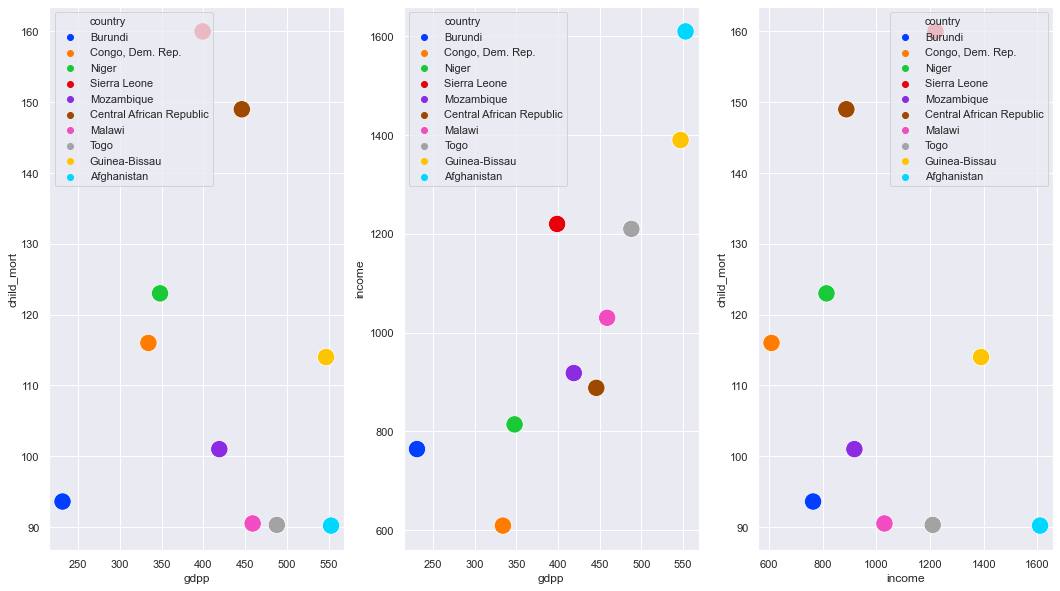

In [117]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 10))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')
plt.show()

# Conclusion

We performed CLUSTERING on the socio-economic data provided for various countries to identify countries to recommend for Financial Aid from the NGO. Based on our Clustering Analysis, we have below the top countries under our 'Under Developed Countries' cluster which are in dire need of the Financial Aid. 

In [118]:
#TOP COUNTRIES recommended for Financial Aid

UDC_top_10

country  gdpp  income  child_mort
26   Burundi                   231   764    93.6000    
37   Congo, Dem. Rep.          334   609    116.0000   
112  Niger                     348   814    123.0000   
132  Sierra Leone              399   1220   160.0000   
106  Mozambique                419   918    101.0000   
31   Central African Republic  446   888    149.0000   
94   Malawi                    459   1030   90.5000    
150  Togo                      488   1210   90.3000    
64   Guinea-Bissau             547   1390   114.0000   
0    Afghanistan               553   1610   90.2000

#                                                 THE END                        





